# Урок 6. Градиентный бустинг. AdaBoost. Домашняя работа

### 1. Для реализованной модели градиентного бустинга постройте графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделайте выводы о зависимости ошибки от этих параметров.

In [191]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import time

In [192]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

Разделим выборку на обучающую и тестовую в соотношении 75/25.

In [193]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [194]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.

In [195]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

Используем $L_{2}$ loss $L(y, z) = (y - z)^{2},$ ее производная по $z$ примет вид $L'(y, z) = 2(z - y)$. Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [196]:
def residual(y, z):
    return - (z - y)

Реализуем функцию обучения градиентного бустинга.

In [197]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [198]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

Построим графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев

In [199]:
# Число деревьев в ансамбле
n_trees = [5, 10, 20, 30, 50]

# Максимальная глубина деревьев
max_depth = [2,3,5,7,10]

# Шаг
eta = 1

In [200]:
def get_error_plot(n_t, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_t)
    plt.plot(list(range(n_t)), train_err, label='train error')
    plt.plot(list(range(n_t)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

n_trees: 5, max_depth: 2


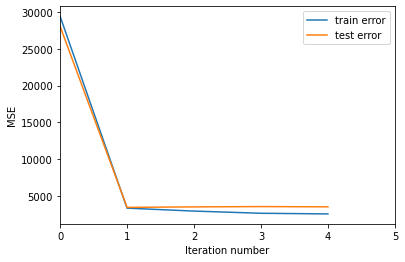

n_trees: 5, max_depth: 3


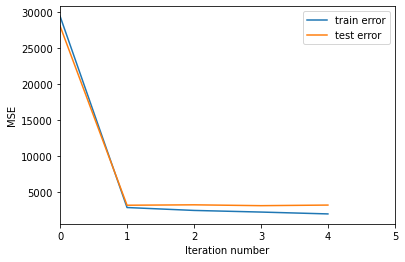

n_trees: 5, max_depth: 5


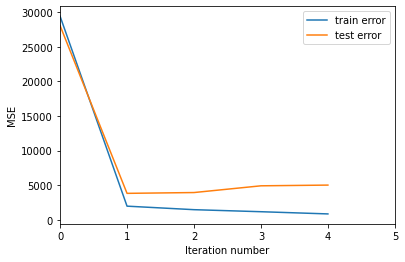

n_trees: 5, max_depth: 7


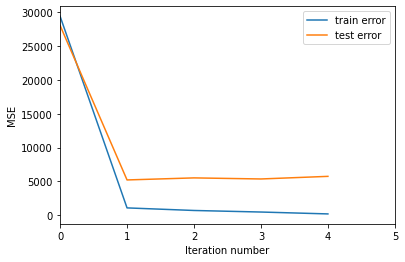

n_trees: 5, max_depth: 10


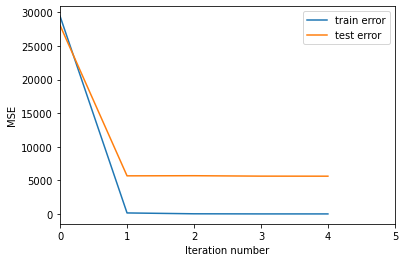

n_trees: 10, max_depth: 2


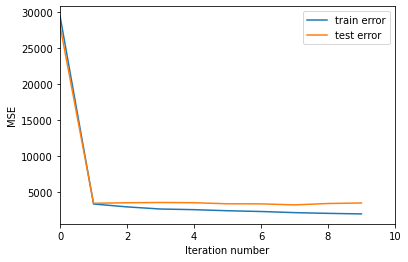

n_trees: 10, max_depth: 3


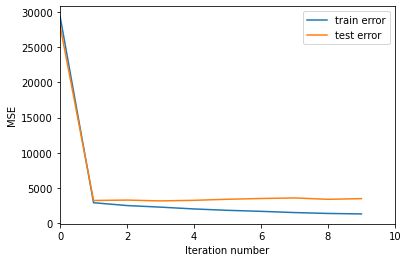

n_trees: 10, max_depth: 5


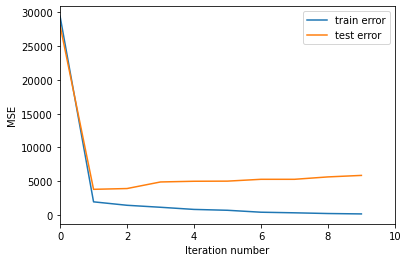

n_trees: 10, max_depth: 7


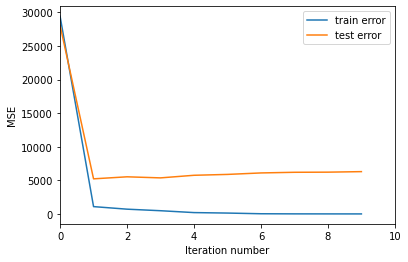

n_trees: 10, max_depth: 10


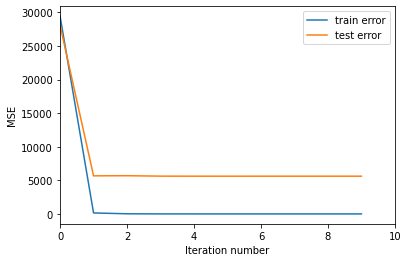

n_trees: 20, max_depth: 2


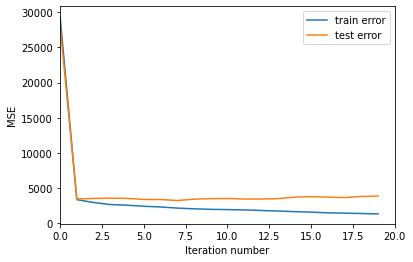

n_trees: 20, max_depth: 3


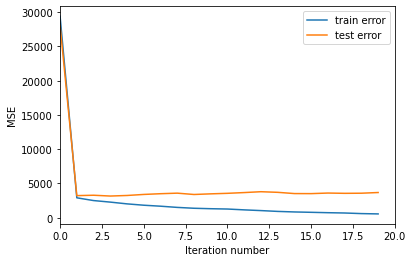

n_trees: 20, max_depth: 5


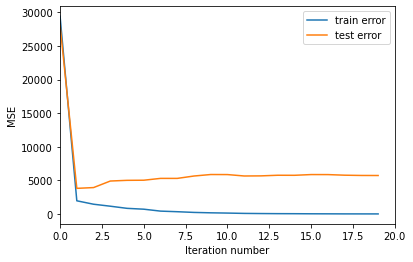

n_trees: 20, max_depth: 7


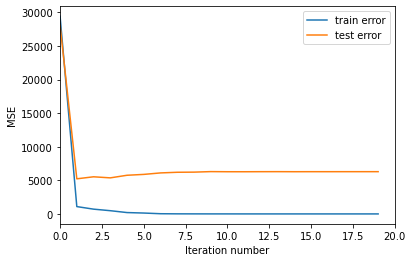

n_trees: 20, max_depth: 10


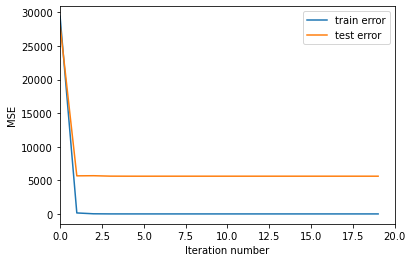

n_trees: 30, max_depth: 2


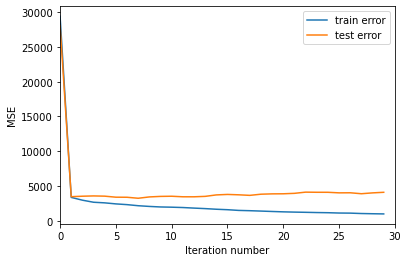

n_trees: 30, max_depth: 3


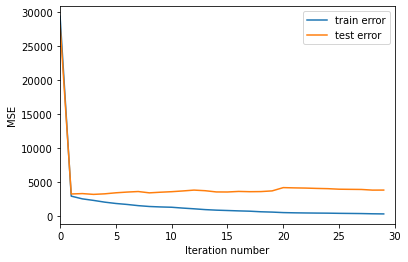

n_trees: 30, max_depth: 5


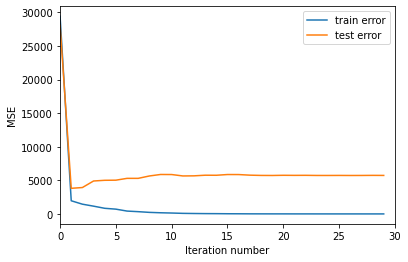

n_trees: 30, max_depth: 7


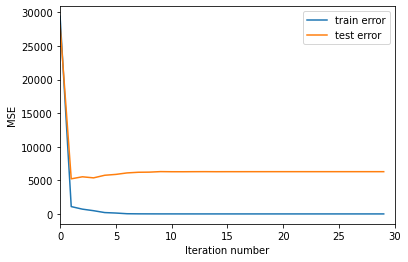

n_trees: 30, max_depth: 10


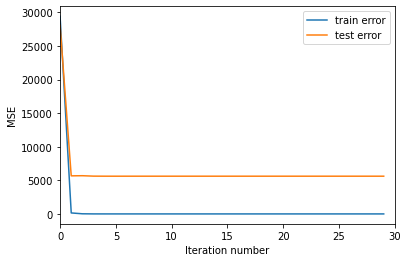

n_trees: 50, max_depth: 2


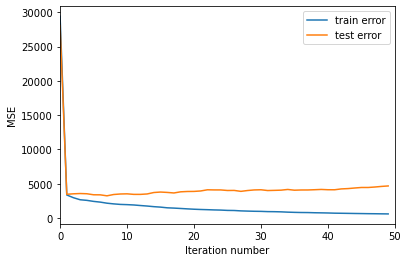

n_trees: 50, max_depth: 3


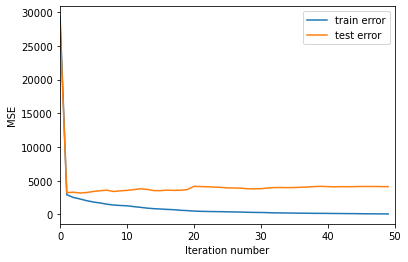

n_trees: 50, max_depth: 5


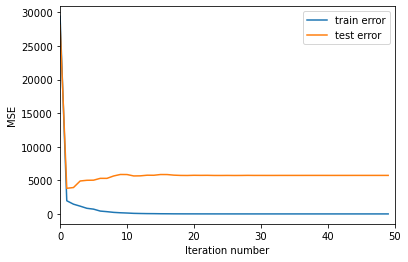

n_trees: 50, max_depth: 7


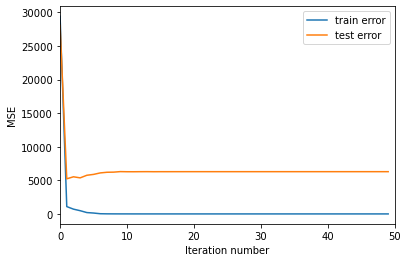

n_trees: 50, max_depth: 10


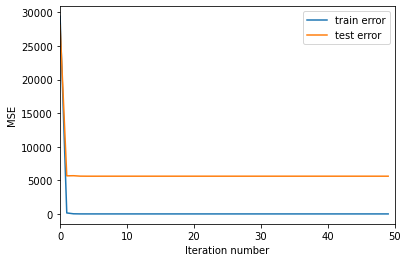

In [201]:
for t in n_trees:
    for el in max_depth:
        print(f'n_trees: {t}, max_depth: {el}')
        trees, train_errors, test_errors = gb_fit(t, el, X_train, X_test, y_train, y_test, eta)
        get_error_plot(t, train_errors, test_errors)

График ошибки на тренировочных данных для разной максимальной глубины дерева


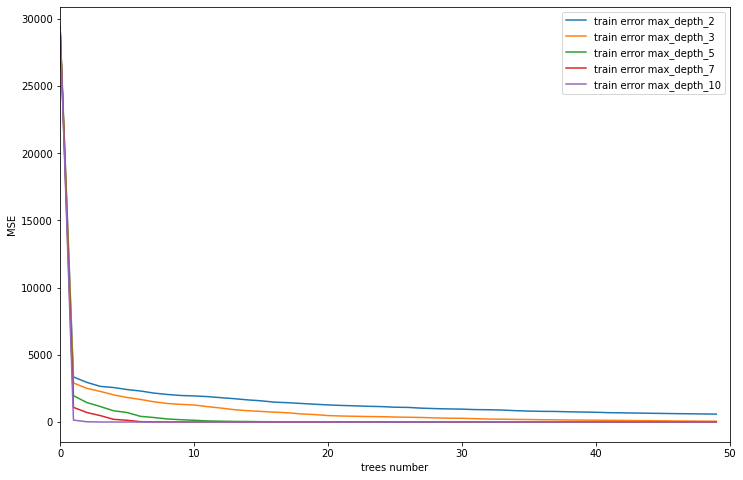

График ошибки на тестовых данных для разной максимальной глубины дерева


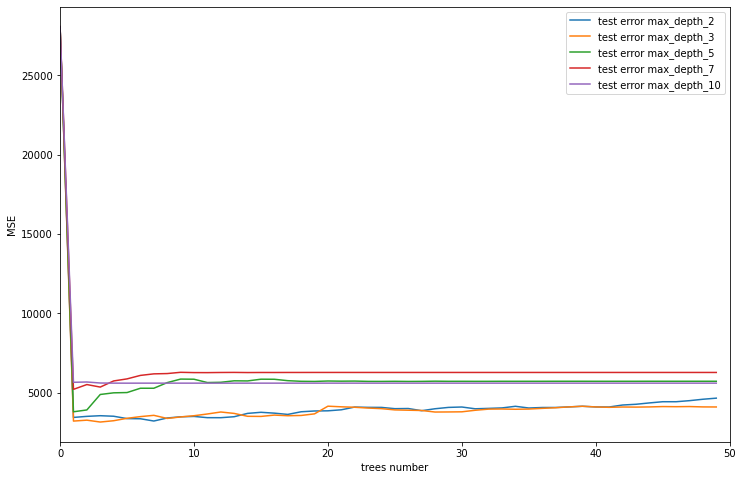

In [202]:
n_trees = 50
train_errors_list = []
test_errors_list = []
for el in max_depth:
    trees, train_errors, test_errors = gb_fit(n_trees, el, X_train, X_test, y_train, y_test, eta)
    train_errors_list.append(train_errors)
    test_errors_list.append(test_errors)

    
print(f'График ошибки на тренировочных данных для разной максимальной глубины дерева')
plt.figure(figsize=(12, 8))
plt.xlabel('trees number')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), train_errors_list[0], label='train error max_depth_2')
plt.plot(list(range(n_trees)), train_errors_list[1], label='train error max_depth_3')
plt.plot(list(range(n_trees)), train_errors_list[2], label='train error max_depth_5')
plt.plot(list(range(n_trees)), train_errors_list[3], label='train error max_depth_7')
plt.plot(list(range(n_trees)), train_errors_list[4], label='train error max_depth_10')
plt.legend(loc='upper right')
plt.show()


print(f'График ошибки на тестовых данных для разной максимальной глубины дерева')
plt.figure(figsize=(12, 8))
plt.xlabel('trees number')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), test_errors_list[0], label='test error max_depth_2')
plt.plot(list(range(n_trees)), test_errors_list[1], label='test error max_depth_3')
plt.plot(list(range(n_trees)), test_errors_list[2], label='test error max_depth_5')
plt.plot(list(range(n_trees)), test_errors_list[3], label='test error max_depth_7')
plt.plot(list(range(n_trees)), test_errors_list[4], label='test error max_depth_10')
plt.legend(loc='upper right')
plt.show()

По результатам анализа графиков видно, что с ростом максимальной глубины дерева модель сильно переобучается. Ошибка на тестовых данных с увеличением максимальной глубины дерева возрастает, она минимальна при максимальной глубине дерева 3. С ростом числа деревьев ошибка сначала снижается,потом начинает расти, количество деревьев в ансамбле нужно ограничить.  Для целей данной задачи (при использовании градиентного бустинга) оптимальным представляется максимальная глубина дерева 3, количество деревьев 10.

 ### 2. Модифицируйте реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки примите равным 0.5. Сравните на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

При использовании стохастического градиентного бустинга используем количество деревьев в ансамбле 30, максимальную глубину дерева 3 и скорость обучения 0,1. Подвыборка будет составлять случайный набор 50% тренировочной выборки.

In [203]:
# Стохастический градиентный бустинг (SGD):
def st_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, size):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    n = X_train.shape[0] 
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        inds = np.random.randint(n, size=round(size*n))
        X_tmp = X_train[inds, ]                       
        y_tmp = np.array(y_train)[inds]      

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_tmp, y_tmp)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_tmp, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_tmp, residual(y_tmp, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [204]:
n_trees = 30
eta = 0.1
size = 0.5
max_depth = 3

In [205]:
s_trees, s_train_errors, s_test_errors = st_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, size)

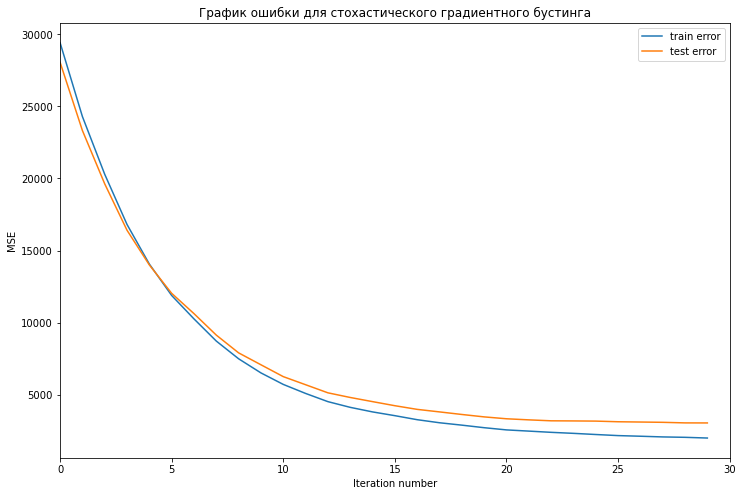

In [206]:
plt.figure(figsize=(12, 8))
plt.title('График ошибки для стохастического градиентного бустинга')
get_error_plot(n_trees, s_train_errors, s_test_errors)

Посмотрим теперь для тех же параметров график для ошибки градиентного бустинга без использования стохастического градиентного бустинга.

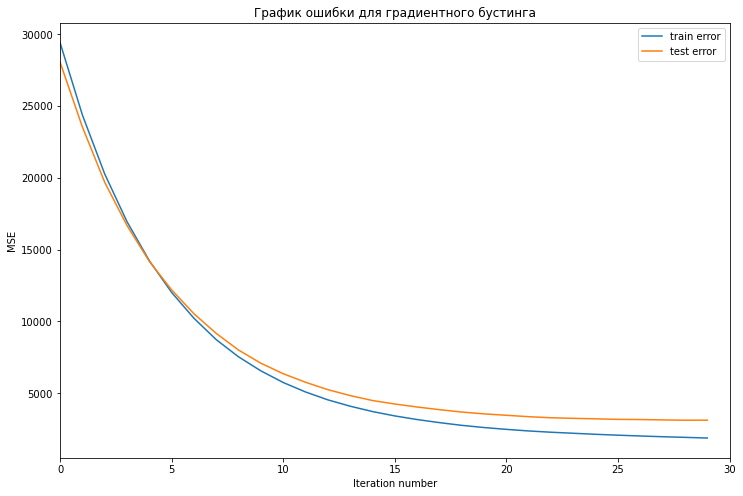

In [207]:
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
plt.figure(figsize=(12, 8))
plt.title('График ошибки для градиентного бустинга')
get_error_plot(n_trees, train_errors, test_errors)

Вывод: график ошибки одинаковый для градиентного тбустинга и для стохастического градиентного бустинга (для подвыборки 50%), но стохастический градиентный бустинг работает намного быстрее.

Теперь посмотрим график сравнения градиентного бустинга и стохастического градиентного бустинга на тренировочных данных и на тестовых данных.

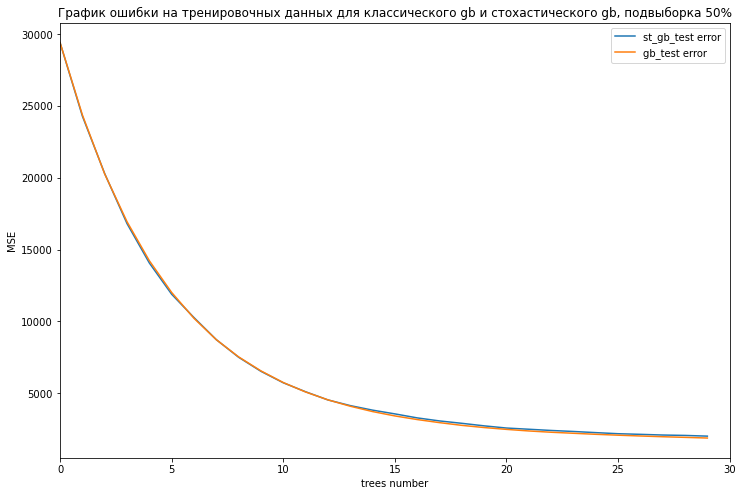

In [208]:
plt.figure(figsize=(12, 8))
plt.title('График ошибки на тренировочных данных для классического gb и стохастического gb, подвыборка 50%')
plt.xlabel('trees number')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), s_train_errors, label='st_gb_test error')
plt.plot(list(range(n_trees)), train_errors, label='gb_test error')

plt.legend(loc='upper right')
plt.show()

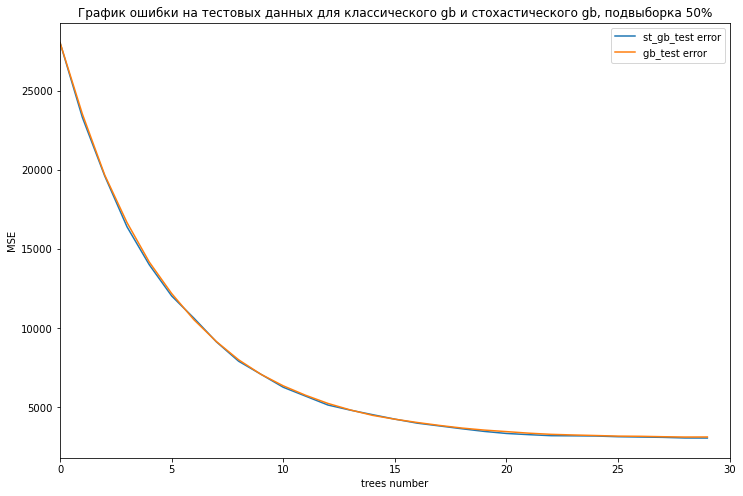

In [209]:
plt.figure(figsize=(12, 8))
plt.title('График ошибки на тестовых данных для классического gb и стохастического gb, подвыборка 50%')
plt.xlabel('trees number')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), s_test_errors, label='st_gb_test error')
plt.plot(list(range(n_trees)), test_errors, label='gb_test error')

plt.legend(loc='upper right')
plt.show()

Вывод: ошибка меняется одинаково на стохастическом градиентном бустинге и на градиентном бустинге. Предпочтительнее использовать стохастический градиентный бустинг, это ускорит обучение модели в разы. Даже применение подвыборки 10% даст нам на тесте практически такие же результаты, что и градиентный бустинг:

In [210]:
size = 0.1

In [211]:
s_trees, s_train_errors, s_test_errors = st_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, size)

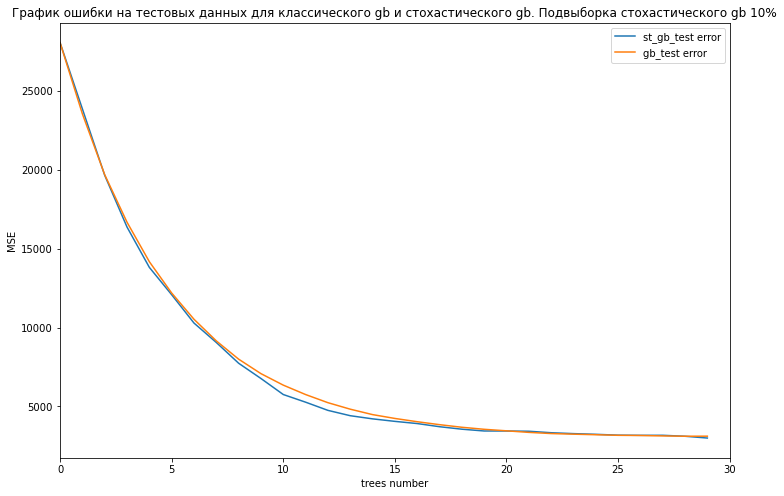

In [212]:
plt.figure(figsize=(12, 8))
plt.title('График ошибки на тестовых данных для классического gb и стохастического gb. Подвыборка стохастического gb 10%')
plt.xlabel('trees number')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), s_test_errors, label='st_gb_test error')
plt.plot(list(range(n_trees)), test_errors, label='gb_test error')

plt.legend(loc='upper right')
plt.show()

Стохастический градиентный бустинг работает для данной задачи лучше, следует пользоваться им.